In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('exploration').getOrCreate()

In [3]:
import sys
!{sys.executable} -m pip install --upgrade pip

Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (19.3.1)


In [10]:
import sys
!{sys.executable} -m pip install --user seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7a/0e/3781e028d62a8422244582abd8f084e6314297026760587c85607f687bf3/scipy-1.3.1-cp35-cp35m-manylinux1_x86_64.whl


In [2]:
import seaborn as sns

In [12]:
import sys
!{sys.executable} -m pip install --user sklearn

     |████████████████████████████████| 6.6MB 49.6MB/s eta 0:00:01
     |████████████████████████████████| 296kB 55.9MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=1ec9a40d00a060782754f75c18dde19ec37f286918faeea6892fdc19aca27afd
  Stored in directory: /home/ubuntu/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [3]:
from sklearn.manifold import TSNE

In [4]:
#import packages
import pandas as pd
import numpy as np


from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
#read in dataset
df = spark.read.csv('HumanActivityiter4.csv', header = True, inferSchema = True)


In [7]:
#convert spark dataframe to pandas dataframe
pandas_df = df.select("*").toPandas()

Text(0.5,0,'Activity')

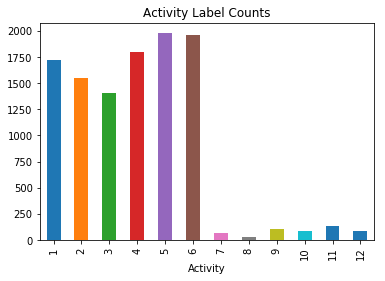

In [7]:
#plot counts in each activity
plot = pandas_df.groupby(['Activity']).size().plot.bar()
plot.set_title("Activity Label Counts")
plot.set_xlabel("Activity")

In [7]:
#separate labels into its own variable to access later
label = pandas_df['Activity']
label_counts = (label.value_counts())
label_counts = label_counts.sort_index()
labels = range(1,13)

In [9]:
#measure correlation between variables
correlation = pandas_df.corr() 
x = (correlation['Activity'])
x = x.sort_values(ascending = False)
x


Activity                       1.000000
tBodyAccJerk-Min-1             0.638353
tGravityAcc-Max-2              0.606691
tBodyAccJerk-Min-2             0.605223
tBodyAccJerk-Min-3             0.568401
tGravityAcc-Mean-2             0.553043
tBodyGyroJerk-Min-1            0.541759
tBodyGyroJerk-Min-3            0.526980
tGravityAcc-Max-3              0.513118
tGravityAcc-ropy-163           0.508244
tXAxisAcc-AngleWRTGravity-1    0.507196
tBodyAcc-Min-1                 0.496155
tBodyGyroJerk-Min-2            0.490308
tBodyAcc-Min-2                 0.486731
tGravityAcc-Min-2              0.485095
tGravityAcc-STD-1              0.474608
tGravityAcc-Mad-1              0.469798
tGravityAcc-Energy-2           0.461008
tGravityAcc-Mean-3             0.458798
tBodyGyro-Min-2                0.454326
tBodyGyro-Min-3                0.447354
tGravityAcc-IQR-1              0.445602
fBodyAccMag-Kurtosis-1         0.439338
tBodyAccJerk-ARCoeff-1         0.433171
fBodyAccJerk-MeanFreq-1        0.429603


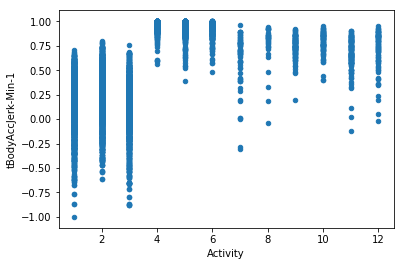

In [10]:
#plot activity against tBodyAccJerk-Min-1
pandas_df.plot(kind = 'scatter',x='Activity',y='tBodyAccJerk-Min-1')


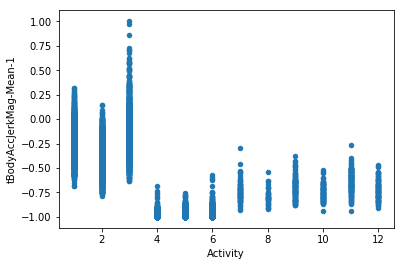

In [11]:
#plot activity against tBodyAccJerk-Min-1
pandas_df.plot(kind = 'scatter',x='Activity',y='tBodyAccJerkMag-Mean-1')

In [12]:
#preparation for creation of class separability graphs
from sklearn.decomposition import PCA
# Create datasets
tsnedata = pandas_df

# Scale data
scl = StandardScaler()
tsnedata = scl.fit_transform(tsnedata)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne = pca.fit_transform(tsnedata)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsnedata)

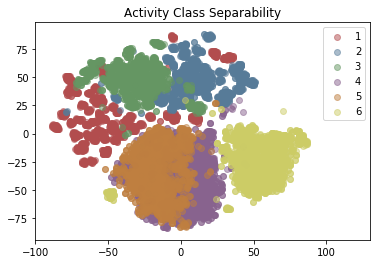

In [13]:
#plot class separability
colors = sns.color_palette("Set1", n_colors=12, desat=.5)
for i, group in enumerate(label_counts.index[0:6]):
    # Mask to separate sets
    mask = (label==group).values
    tsneplot = plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
    plt.title("Activity Class Separability")
    plt.xlim(-100,130)
    plt.legend(loc = 1)


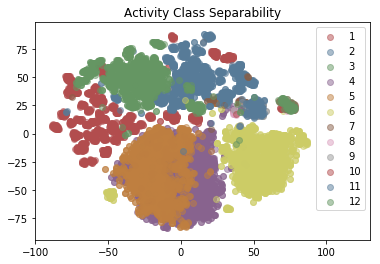

In [14]:
#plot class separability of all 12 classes
colors = sns.color_palette("Set1", n_colors=12, desat=.5)

for i, group in enumerate(label_counts.index[0:12]):
    # Mask to separate sets
    mask = (label==group).values
    tsneplot = plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
    plt.title("Activity Class Separability")
    plt.xlim(-100,130)
    plt.legend(loc = 1)


In [ ]:
#MultiCollinearity
corr = np.corrcoef(pandas_df)
w,v = np.linalg.eig(corr)

#number of near to zero eigenvalues
len(w[w<0.01])

In [10]:
#3.1 Removal of Classes 7 - 12
df= df.where("Activity<7")
df.select("Activity").show(100)

+--------+
|Activity|
+--------+
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       5|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       4|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       6|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|

In [41]:
#read in altered dataset (some data has been manually removed from dataset for example purposes)
df = spark.read.csv('HumanActivity Missing Data.csv', header = True, inferSchema = True)

++
||
++
||
||
||
||
||
||
||
||
||
||
||
||
||
||
||
||
||
||
||
||
++
only showing top 20 rows



In [29]:
#Drop row with missing value
df = df.na.drop()
df.show()

+---------------+---------------+---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------+-----------------+-----------------+--------------+--------------+--------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+----------------------+----------------------+----------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------

In [42]:
#show the sparse column data
df.select('tBodyAcc-Mean-3').show()

+---------------+
|tBodyAcc-Mean-3|
+---------------+
|           null|
|   -0.029067362|
|   -0.022650708|
|   -0.028915779|
|           null|
|   -0.017340265|
|   -0.020456504|
|           null|
|   -0.027300691|
|    -0.01793221|
|           null|
|   -0.019295589|
|   -0.022185034|
|   -0.018373219|
|    0.003710064|
|           null|
|   -0.042163068|
|           null|
|           null|
|    0.066902583|
+---------------+
only showing top 20 rows



In [43]:
import pyspark.sql.functions as F
#Delete column with missing values
null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()
to_drop = [k for k, v in null_counts.items() if v > 0]
df = df.drop(*to_drop)


In [45]:
#Integrate two datasets
df = df.union(df)


In [35]:
#plot12
df.dtypes

[('tBodyAcc-Mean-2', 'double'),
 ('tBodyAcc-STD-1', 'double'),
 ('tBodyAcc-STD-2', 'double'),
 ('tBodyAcc-STD-3', 'double'),
 ('tBodyAcc-Mad-1', 'double'),
 ('tBodyAcc-Mad-2', 'double'),
 ('tBodyAcc-Mad-3', 'double'),
 ('tBodyAcc-Max-1', 'double'),
 ('tBodyAcc-Max-2', 'double'),
 ('tBodyAcc-Max-3', 'double'),
 ('tBodyAcc-Min-1', 'double'),
 ('tBodyAcc-Min-2', 'double'),
 ('tBodyAcc-Min-3', 'double'),
 ('tBodyAcc-SMA-1', 'double'),
 ('tBodyAcc-Energy-1', 'double'),
 ('tBodyAcc-Energy-2', 'double'),
 ('tBodyAcc-Energy-3', 'double'),
 ('tBodyAcc-IQR-1', 'double'),
 ('tBodyAcc-IQR-2', 'double'),
 ('tBodyAcc-IQR-3', 'double'),
 ('tBodyAcc-ropy-122', 'double'),
 ('tBodyAcc-ropy-123', 'double'),
 ('tBodyAcc-ropy-124', 'double'),
 ('tBodyAcc-ARCoeff-1', 'double'),
 ('tBodyAcc-ARCoeff-2', 'double'),
 ('tBodyAcc-ARCoeff-3', 'double'),
 ('tBodyAcc-ARCoeff-4', 'double'),
 ('tBodyAcc-ARCoeff-5', 'double'),
 ('tBodyAcc-ARCoeff-6', 'double'),
 ('tBodyAcc-ARCoeff-7', 'double'),
 ('tBodyAcc-ARCoeff-8',

In [19]:
#vectorise the data in order to input into principle component analysis
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=df.columns[:-1],outputCol='features')
df2 = assembler.transform(df)

#Apply principle component analysis
from pyspark.ml.feature import PCA
pca = PCA(k=2, inputCol='features', outputCol='features_pca')

pca_model = pca.fit(df2)

pca_data = pca_model.transform(df2).select('features_pca')

In [20]:
pca_data.show()


+--------------------+
|        features_pca|
+--------------------+
|[-15.618285659760...|
|[-15.648765992555...|
|[-15.592824563618...|
|[-15.773829401919...|
|[-15.829849824622...|
|[-15.799034104859...|
|[-15.515835710289...|
|[-15.649464844039...|
|[-15.752013427527...|
|[-15.277553763872...|
|[-15.335476421274...|
|[-16.102945735947...|
|[-16.154279071463...|
|[-16.121485952417...|
|[-10.080331393346...|
|[-13.296448692313...|
|[-15.404523003215...|
|[-15.608021884959...|
|[-10.992306258345...|
|[-10.319825008257...|
+--------------------+
only showing top 20 rows



In [11]:
#vectorise data
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=df.columns[:-1],outputCol='features')
df2 = assembler.transform(df)

#split data into training and testing
(trainingData, testData) = df2.randomSplit([0.7, 0.3])

In [17]:
#perform decision tree classification
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dt = DecisionTreeClassifier(labelCol='Activity', featuresCol="features",maxDepth=30, maxBins = 20)
model = dt.fit(trainingData)
predictions = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(\
labelCol="Activity", predictionCol="prediction",\
metricName="accuracy")

#use accuracy to evaluate the performance
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g "% (1.0 - accuracy))
from pyspark.sql.functions import expr
predictions = predictions.withColumn("prediction", expr("CAST(prediction AS INTEGER)"))

#produce a confusion matrix
predictionspd = predictions.select("prediction").toPandas()
actualpd = testData.select('Activity').toPandas()
print(pd.crosstab(actualpd.Activity, predictionspd.prediction, rownames=['Actual'], colnames=['Predicted']))

Test Error = 0.0708047 
Predicted    1    2    3    4    5    6
Actual                                 
1          500   28   10    0    0    0
2           20  478   16    0    0    1
3           16   27  422    0    0    0
4            1    0    0  450   46    3
5            0    0    0   59  551    0
6            0    0    0    0    0  578


In [18]:
#perform random forest classification
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Activity', numTrees = 18)
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)

evaluator = MulticlassClassificationEvaluator(\
labelCol="Activity", predictionCol="prediction",\
metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test Error = %g "% (1.0 - accuracy))

from pyspark.sql.functions import expr
predictions = predictions.withColumn("prediction", expr("CAST(prediction AS INTEGER)"))

#produce confusion matrix
predictionspd = predictions.select("prediction").toPandas()
actualpd = testData.select('Activity').toPandas()
print(pd.crosstab(actualpd.Activity, predictionspd.prediction, rownames=['Actual'], colnames=['Predicted']))


Test Error = 0.0801622 
Predicted    1    2    3    4    5    6
Actual                                 
1          509   22    7    0    0    0
2           21  479   15    0    0    0
3           28   38  399    0    0    0
4            0    0    0  453   47    0
5            0    0    0   79  531    0
6            0    0    0    0    0  578
